In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import pickle
import os
import sys
sys.path.append(os.path.abspath("../"))
from src.ga import GeneticAlgorithmOptimizer
from src.preprocessing import RegionFilter, bed_num_imputation, WeightedAverageDistribution

plt.rcParams["font.size"] = 9

In [2]:
with open("../optuna_output/min_cost__gyeongbuk_ers__no_init/study.pickle", "rb") as fr:
    study = pickle.load(fr)
print(len(study.trials))

6302


In [3]:
none_trials = [t.number for t in study.trials if t.values is None]
objectives = [t.values[0] for t in study.trials if t.number not in none_trials]
tri_orig = study.trials[0].user_attrs["tri"]
constraint_buffer = 0.001
constraints = [100 * (t.user_attrs["tri"]) for t in study.trials if t.number not in none_trials]
alphas = [1 if c >= 100 * (tri_orig - constraint_buffer) else 0.2 for c in constraints]

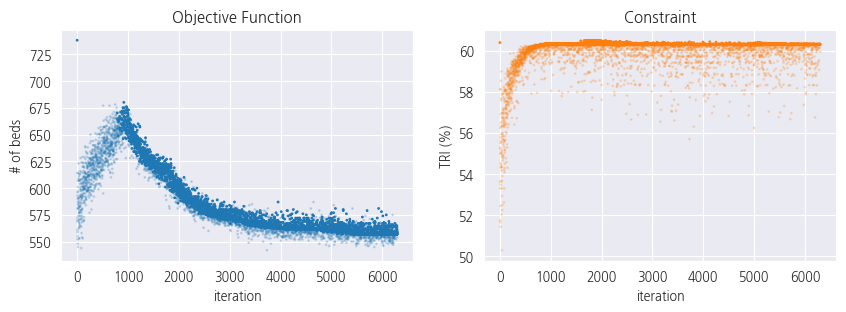

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(np.arange(len(study.trials) - len(none_trials)), objectives, s=1, alpha=alphas)
axes[1].scatter(np.arange(len(study.trials) - len(none_trials)), constraints, color=sns.color_palette()[1], s=1, alpha=alphas)
axes[0].set_xlabel("iteration")
axes[1].set_xlabel("iteration")
axes[0].set_ylabel("# of beds")
axes[1].set_ylabel("TRI (%)")
axes[0].set_title("Objective Function")
axes[1].set_title("Constraint")
plt.show()

In [43]:
er_df = pd.read_csv("../data/processed/emergency_df.csv")
bed_num_imputation(er_df)
er_tk = er_df[(er_df.시도 == "경북") & (er_df.시군구 != "울릉군")]
er_tk = er_tk[["hpid", "기관명", "시도", "시군구", "의료기관분류", "hperyn"]].set_index("hpid")
df = er_tk.join(pd.Series(study.best_params, name="delta"), how="left")
df["result"] = df.hperyn + df.delta
df.rename({"hperyn": "병상 수_before", "result": "병상 수_after"}, axis=1, inplace=True)
df

,기관명,시도,시군구,의료기관분류,병상 수_before,delta,병상 수_after
hpid,,,,,,,
A2700014,의료법인안동병원,경북,안동시,권역응급의료센터,18.0,-7,11.0
A2700007,차의과학대학교부속구미차병원,경북,구미시,권역응급의료센터,28.0,-10,18.0
A2700016,포항성모병원,경북,포항시,권역응급의료센터,31.0,-10,21.0
A2700003,동국대학교의과대학경주병원,경북,경주시,지역응급의료센터,17.0,0,17.0
A2700013,순천향대학교부속구미병원,경북,구미시,지역응급의료센터,20.0,-1,19.0
A2700004,안동성소병원,경북,안동시,지역응급의료센터,20.0,-7,13.0
A2700012,의료법인덕산의료재단김천제일병원,경북,김천시,지역응급의료센터,20.0,-5,15.0
A2700006,의료법인동춘의료재단문경제일병원,경북,문경시,지역응급의료센터,20.0,-9,11.0
A2700002,포항세명기독병원,경북,포항시,지역응급의료센터,21.0,-1,20.0


In [5]:
with open("../optuna_output/max_tri__gyeongbuk_ers__no_init/study.pickle", "rb") as fr:
    study = pickle.load(fr)
print(len(study.trials))

1000


In [6]:
none_trials = [t.number for t in study.trials if t.values is None]
objectives = [t.values[0] * 100 for t in study.trials if t.number not in none_trials]
num_beds_orig = study.trials[0].user_attrs["num_beds"]
constraint_buffer = 5
constraints = [t.user_attrs["num_beds"] for t in study.trials if t.number not in none_trials]
alphas = [1 if c <= num_beds_orig + constraint_buffer else 0.2 for c in constraints]

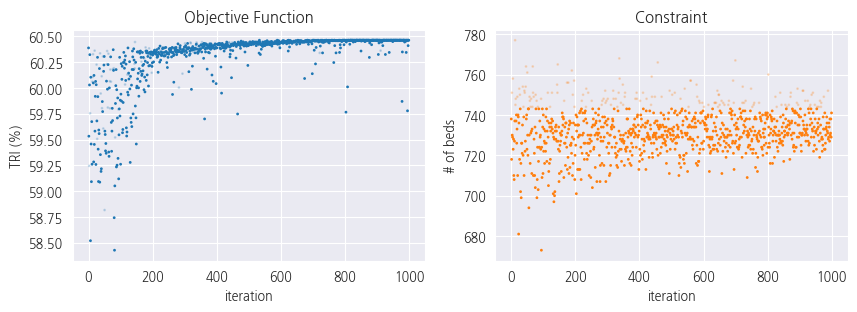

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(np.arange(len(study.trials) - len(none_trials)), objectives, s=1, alpha=alphas)
axes[1].scatter(np.arange(len(study.trials) - len(none_trials)), constraints, color=sns.color_palette()[1], s=1, alpha=alphas)
axes[0].set_xlabel("iteration")
axes[1].set_xlabel("iteration")
axes[0].set_ylabel("TRI (%)")
axes[1].set_ylabel("# of beds")
axes[0].set_title("Objective Function")
axes[1].set_title("Constraint")
plt.show()